In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import cross_validate


def standardize(data):
    scaled = preprocessing.scale(data)
    # names = ['price', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
    #          'Large Bags', 'XLarge Bags']
    # df_scaled = pd.DataFrame(scaled, columns=names)
    df_scaled = pd.DataFrame(scaled)
    return df_scaled

def train_model(model_name,X_train, X_test,y_train, y_test):
    if model_name == "LDA":
        model = LinearDiscriminantAnalysis()
        trained_model = model.fit(X_train, y_train)
        title = 'Confusion matrix, Linear Discriminant Analysis'
    elif model_name == "KNN":
        model = KNeighborsClassifier(n_neighbors=3)
        trained_model = model.fit(X_train, y_train)
        title = 'Confusion matrix, KNN'
    elif model_name == "NB":
        model = MultinomialNB()
        trained_model = model.fit(X_train, y_train)
        title = 'Confusion matrix, Naive Bayes'
    elif model_name == "Logistic":
        model = LogisticRegression()
        trained_model = model.fit(X_train, y_train)
        title = 'Confusion matrix, Logistic regression'

    y_pred = trained_model.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['0', '1'],title=title)

def cv_test(model_name,input,label):
    if model_name == "LDA":
        model = LinearDiscriminantAnalysis()
    elif model_name == "KNN":
        model = KNeighborsClassifier(n_neighbors=3)
    elif model_name == "NB":
        model = MultinomialNB()
    elif model_name == "Logistic":
        model = LogisticRegression()

    metrics = ['precision_macro', 'recall_macro', "f1_macro"]
    cv = cross_validate(model, input, label, scoring=metrics, cv=5)
    print("\nTest data set average fscore:")
    print(cv['test_f1_macro'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def train_and_predict(model_name,X_train,y_train,X_predict):
    # print("length of xtrain ytrain:\n")
    # print(len(X_train))
    # print(len(y_train))
    if model_name == "LDA":
        model = LinearDiscriminantAnalysis()
        trained_model = model.fit(X_train, y_train)
        title = 'Confusion matrix, Linear Discriminant Analysis'
    elif model_name == "KNN":
        model = KNeighborsClassifier(n_neighbors=3)
        trained_model = model.fit(X_train, y_train)
        title = 'Confusion matrix, KNN'
    elif model_name == "NB":
        model = MultinomialNB()
        trained_model = model.fit(X_train, y_train)
        title = 'Confusion matrix, Naive Bayes'
    elif model_name == "Logistic":
        model = LogisticRegression()
        trained_model = model.fit(X_train, y_train)
        title = 'Confusion matrix, Logistic regression'
    print("training complete!")

    y_pred = trained_model.predict(X_predict)
    return y_pred
    
# def classification(tfidf_input):
def classification():
    # data = pd.read_csv("~/Documents/660document/score2.csv", header=0)
    # data = pd.read_csv("final_predict.csv", header=0)
    data = pd.read_csv("final_score_stem.csv", header=0)
    length1 = len(data)
    pre_data = pd.read_excel("News title.xlsx")
    length2 = len(pre_data)
    print("read file finished!")

    #set classification input
    data_input = data['title']
    data_input = data_input.append(pre_data['title'])
    print("length of all data:",len(data_input))
    tfid_vec = TfidfVectorizer(stop_words = 'english')
    tfidf_np = tfid_vec.fit_transform(data_input).toarray()
    tfidf_all = pd.DataFrame(tfidf_np)
    tfidf = tfidf_all.iloc[0:length1]
    pre_tfidf = tfidf_all.iloc[length1:]
    print("width of tfidf:",len(tfidf.iloc[0]))
    print("width of pre_tfidf:",len(pre_tfidf.iloc[0]))
    # print(pre_data['title'])
    # pre_data_input = pre_data['title']
    # pre_tfid_vec = TfidfVectorizer(stop_words = 'english')
    # pre_tfidf_np = pre_tfid_vec.fit_transform(pre_data_input).toarray()
    # pre_tfidf = pd.DataFrame(pre_tfidf_np)
    print("get tfidf finished")
    # #you can use function input as  tf idf
    # tfidf = tfidf_input
    # change the training input
    if 0:
        # for i in range(1000):
        #     print(i)
        #     tfidf = pd.concat([tfidf, data[["main_dirty","sub_dirty","creat_time", "last"]]], axis=1, sort=False)
        #     tfidf = pd.concat([tfidf, data[["active","negative","title_sentiment","creat_time"]]], axis=1, sort=False)
        tfidf = pd.concat([tfidf, data[["main_dirty","sub_dirty","creat_time", "last"]]], axis=1, sort=False)
        # tfidf = pd.concat([tfidf, data["creat_time"]], axis=1, sort=False)
    print("length of tfidf:",len(tfidf))
    # tfidf.to_csv('~/Documents/660document/classification_new_tfidf.csv')
    print("get ready for the independent variables")

    #set labels
    data['sort_num'] = data['comment_count'].rank(ascending=0, method='first')
    length = len(data['comment_count'])

    data['hot'] = None
    data['pos_neg_label'] = None
    label1 = []
    label2 = []
    # for sort_num,main_pos,main_neg in zip(data['sort_num'],data['main_pos'],data['main_neg']):
    for comment_num, main_pos, main_neg in zip(data['comment_count'], data['main_pos'], data['main_neg']):
        # if sort_num <= length/2:
        #     label1.append(1)
        # else :
        #     label1.append(0)
        if comment_num >= 10:
            label1.append(1)
        else :
            label1.append(0)

        if main_pos > main_neg:
            label2.append(1)
        else:
            label2.append(0)

    data['hot'] = label1
    data['pos_neg_label'] = label2
    cl = data[['hot','pos_neg_label']]
    data.drop('hot',axis = 1)
    data.drop('pos_neg_label',axis = 1)
    print("set label finished")

    # standardize
    if 0:
        tfidf = standardize(tfidf)


    #train data and test data
    X_train, X_test, y_train, y_test = train_test_split(tfidf, cl, test_size=0.3, random_state=0)

    print("------------single label------------")
    print("comment_count:")
    # LDA
    print("LDA")
    train_model("LDA",X_train, X_test,y_train['hot'], y_test['hot'])
    cv_test("LDA", tfidf, cl['hot'])
    #KNN
    print("KNN")
    train_model("KNN",X_train, X_test,y_train['hot'], y_test['hot'])
    cv_test("KNN", tfidf, cl['hot'])
    print("the prediction result is:",train_and_predict("KNN",X_train, y_train['hot'],pre_tfidf))
    # Logistic
    #train_model("Logistic",X_train, X_test,y_train['hot'], y_test['hot'])
    # NB
    #train_model("NB",X_train, X_test,y_train['up_down_label'], y_test['up_down_label'])
    print("pos_neg:")
    # LDA
    print("LDA")
    train_model("LDA", X_train, X_test, y_train['pos_neg_label'], y_test['pos_neg_label'])
    cv_test("LDA", tfidf, cl['pos_neg_label'])
    # KNN
    print("KNN")
    train_model("KNN", X_train, X_test, y_train['pos_neg_label'], y_test['pos_neg_label'])
    cv_test("KNN", tfidf, cl['pos_neg_label'])
    # Logistic
    print("Logistic")
    train_model("Logistic", X_train, X_test, y_train['pos_neg_label'], y_test['pos_neg_label'])
    cv_test("Logistic", tfidf, cl['pos_neg_label'])
    # NB
    # train_model("NB", X_train, X_test, y_train['pos_neg_label'], y_test['pos_neg_label'])

    return


if __name__ == "__main__":
    classification()


The function:

There are several functions in the code:

1 def standardize(data)

    This one is used in the pre-processing.
    
2 def train_model(model_name,X_train, X_test,y_train, y_test)

    This function si used to train the model, input the model name like "KNN","Logistic". Also input the trainning data and testing data. It will train the data and also test data. And it will call plot_confusion_matrix(): to draw a picture of confusion matrix. 
    
3 def cv_test(model_name,input,label)

    This function use another way to train the model, crossvalidation. And it will return the average score of each model.
    
4 def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
                          
    This function is used to draw the confusion matrix.
    
5 def train_and_predict(model_name,X_train,y_train,X_predict):

    This function is used to train the model and predict the data from real world.
    
6 def classification()

    This is the main function that will call all functions above.

When we use comment number > 10 as the standard of hot post, we train the model with several algorithms.

This is the confusion matrix from KNN:
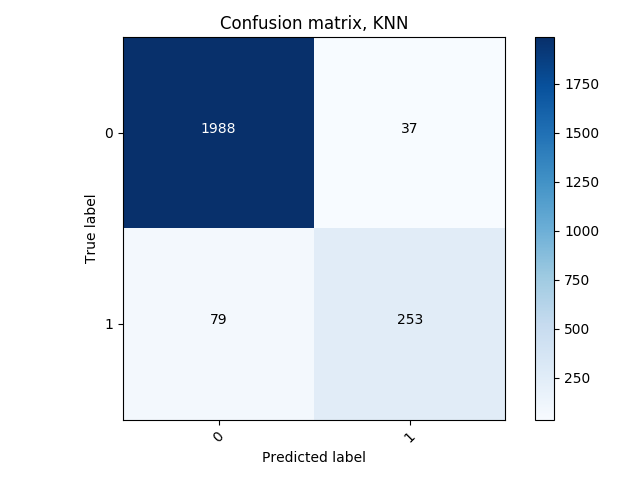
This is the result using cross validation with KNN:
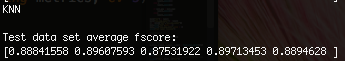
This is the confusion matrix from Linear Discriminant Analysis:
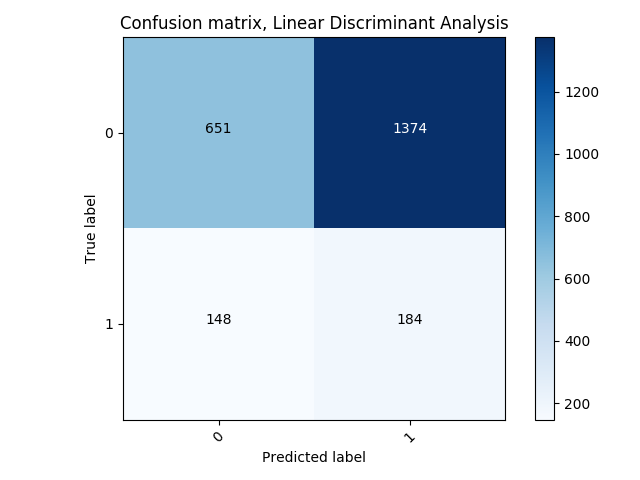
This is the result using cross validation with Linear Discriminant Analysis:


Then we make some change to our input variables. Now we only use the tfidf matrix generated from the post title to train the model.
Still, we use comment number > 10 as the standard of hot post. And this is the confusion matrix from KNN:
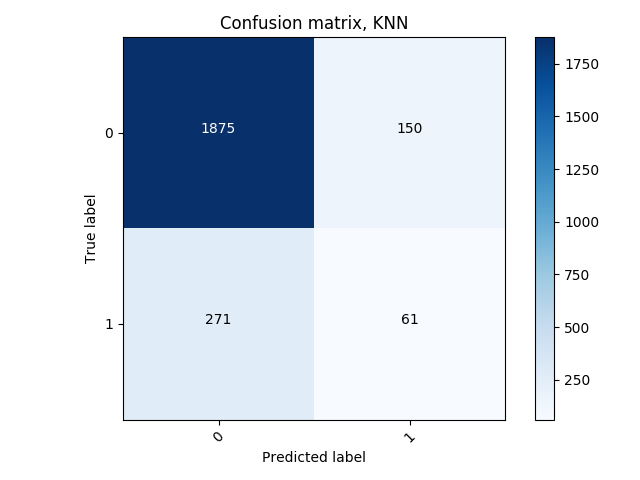
Then we change the way to define hot label. Now we use the top 25% post as the hot post. This is the confusion matrix from KNN
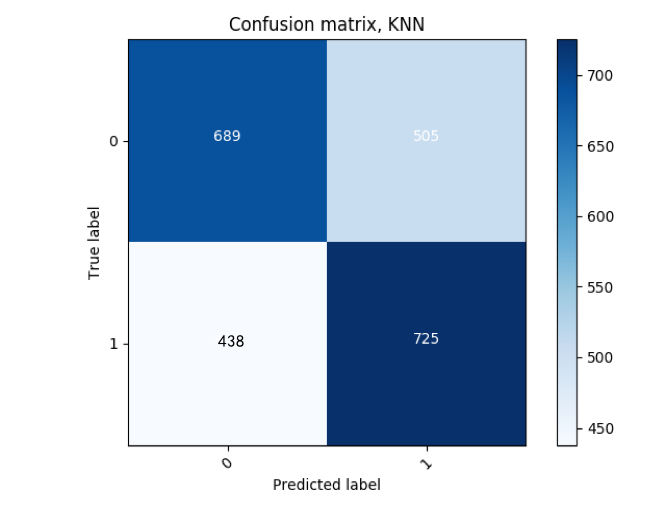

Also, we did some work to predict the sentiment of comment.
This is the result from LDA model:
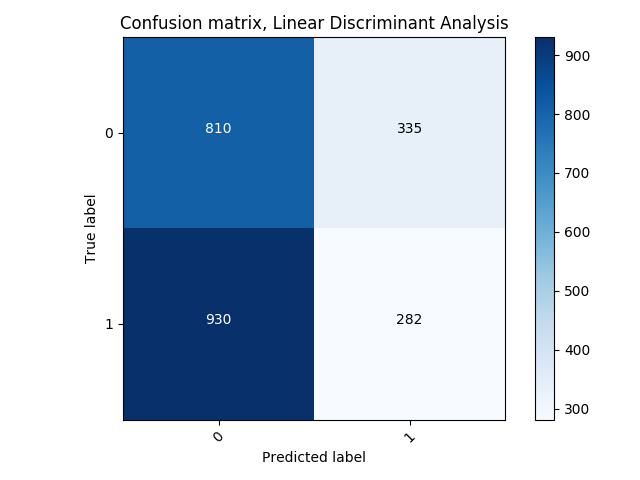
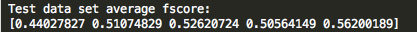
This is the result from Logistic model:
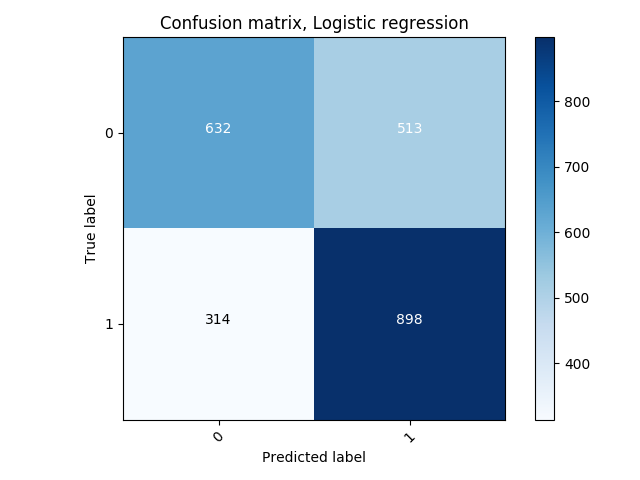
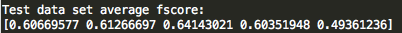